## 🔧 INTELLIGENT FAULT DETECTION & CONDITION HEALTH MONITORING, DESIGNED BY KWIZERA Celestin

## STEP 1: Load Dataset

In [1]:
import pandas as pd

dataset = pd.read_csv("dataset.csv")

dataset.head()

,Vibration_mm_s,Temperature_C,Current_A,Voltage_V,Speed_RPM,Fault_Label,Fault_Type
0,1.299343,54.446943,10.518151,407.615149,1496.487699,0,Healthy
1,1.153173,61.316851,10.613948,397.652628,1508.138401,0,Healthy
2,1.107316,53.137081,10.193570,390.433599,1474.126233,0,Healthy
3,1.087542,50.948676,10.251398,395.459880,1478.815444,0,Healthy
4,1.493130,54.096895,10.054023,392.876259,1491.834259,0,Healthy


## STEP 2: Basic Dataset Inspection

In [2]:
dataset.info()
dataset.describe()
dataset['Fault_Type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vibration_mm_s  5000 non-null   float64
 1   Temperature_C   5000 non-null   float64
 2   Current_A       5000 non-null   float64
 3   Voltage_V       5000 non-null   float64
 4   Speed_RPM       5000 non-null   float64
 5   Fault_Label     5000 non-null   int64  
 6   Fault_Type      5000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 273.6+ KB


Fault_Type
Healthy                 1000
Bearing Fault           1000
Rotor Imbalance         1000
Stator Winding Fault    1000
Overheating             1000
Name: count, dtype: int64

## STEP 3: Feature Selection & Label Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

X = dataset.drop(['Fault_Label', 'Fault_Type'], axis=1)
y = dataset['Fault_Label']

## STEP 4: Train–Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## STEP 5: Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## STEP 6: AI Model – Random Forest (Best Choice)

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

## STEP 7: Model Evaluation

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.902

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       200
           1       0.81      0.76      0.79       200
           2       0.78      0.81      0.79       200
           3       0.96      0.95      0.96       200
           4       0.97      0.98      0.98       200

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [8]:
confusion_matrix(y_test, y_pred)

array([[200,   0,   0,   0,   0],
       [  1, 152,  44,   3,   0],
       [  2,  35, 162,   1,   0],
       [  0,   0,   2, 191,   7],
       [  0,   0,   0,   3, 197]])

## STEP 8: Fault Label Dictionary

In [9]:
fault_map = {
    0: "Healthy",
    1: "Bearing Fault",
    2: "Rotor Imbalance",
    3: "Stator Winding Fault",
    4: "Overheating"
}

## STEP 9: Condition Health Index (CHI)

In [10]:
def health_index(vibration, temperature, current):
    score = 100
    score -= vibration * 5
    score -= (temperature - 50) * 0.7
    score -= abs(current - 10) * 3
    return max(0, min(100, score))

## STEP 10: Real-Time Condition Monitoring (Simulation)

In [11]:
import time
import numpy as np

for i in range(10):
    sample = X_test[i].reshape(1, -1)
    prediction = model.predict(sample)[0]

    real_data = dataset.iloc[i]
    chi = health_index(
        real_data['Vibration_mm_s'],
        real_data['Temperature_C'],
        real_data['Current_A']
    )

    print(f"Fault Detected: {fault_map[prediction]}")
    print(f"Health Index: {chi:.2f}%")
    print("-" * 40)

    time.sleep(1)

Fault Detected: Bearing Fault
Health Index: 88.84%
----------------------------------------
Fault Detected: Stator Winding Fault
Health Index: 84.47%
----------------------------------------
Fault Detected: Healthy
Health Index: 91.69%
----------------------------------------
Fault Detected: Bearing Fault
Health Index: 93.14%
----------------------------------------
Fault Detected: Rotor Imbalance
Health Index: 89.50%
----------------------------------------
Fault Detected: Healthy
Health Index: 92.71%
----------------------------------------
Fault Detected: Healthy
Health Index: 85.88%
----------------------------------------
Fault Detected: Rotor Imbalance
Health Index: 86.43%
----------------------------------------
Fault Detected: Healthy
Health Index: 89.00%
----------------------------------------
Fault Detected: Rotor Imbalance
Health Index: 89.97%
----------------------------------------


## 🔹 STEP 11: Visualization – Condition Monitoring

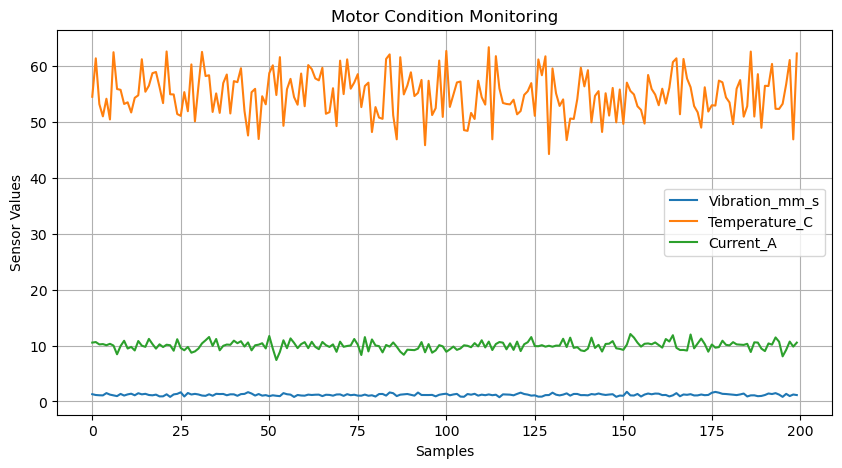

In [12]:
import matplotlib.pyplot as plt

dataset[['Vibration_mm_s', 'Temperature_C', 'Current_A']].head(200).plot(
    figsize=(10, 5)
)

plt.title("Motor Condition Monitoring")
plt.xlabel("Samples")
plt.ylabel("Sensor Values")
plt.grid()
plt.show()

## STEP 12: Alert System

In [13]:
def alert_system(prediction, chi):
    if prediction != 0:
        return "⚠ WARNING: Motor Fault Detected"
    elif chi < 60:
        return "⚠ CAUTION: Degrading Motor Health"
    else:
        return "✅ Motor Operating Normally"

In [14]:
print(alert_system(prediction, chi))

⚠ WARNING: Motor Fault Detected


## STEP 13: Predict New Motor Condition (User Input)

In [15]:
new_sample = pd.DataFrame([{
    "Vibration_mm_s": 3.9,
    "Temperature_C": 78,
    "Current_A": 13,
    "Voltage_V": 392,
    "Speed_RPM": 1420
}])

new_sample_scaled = scaler.transform(new_sample)
pred = model.predict(new_sample_scaled)[0]

print("Predicted Fault:", fault_map[pred])

Predicted Fault: Stator Winding Fault


In [16]:
import joblib

In [17]:
joblib.dump(model, "project_model.pkl")

['project_model.pkl']

In [18]:
joblib.dump(scaler, "project_scaler.pkl")

['project_scaler.pkl']